In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("/Users/nurannalci/Desktop/high-school-directory.csv")
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [9]:
# Clean column names
df.columns = (
    df.columns
    .str.lower()                # convert all letters to lowercase
    .str.replace(' ', '_')      # replace spaces with underscores
    .str.replace('[^a-z0-9_]', '', regex=True)  # remove special characters
)

# Display the first 5 rows again
df.head()



,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [10]:
# Filter only the schools located in Brooklyn
brooklyn_df = df[df['borough'] == 'Brooklyn']

# Display the first 5 rows of Brooklyn schools
brooklyn_df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


In [11]:
# Count unique schools in Brooklyn
unique_schools_brooklyn = brooklyn_df['dbn'].nunique()
unique_schools_brooklyn


121

In [12]:
# Count how many Brooklyn schools offer Grade 9 entry
grade9_schools = brooklyn_df[brooklyn_df['grade_span_min'] <= 9]['dbn'].nunique()
grade9_schools


121

In [13]:
# Group and summarize by borough
borough_summary = (
    df.groupby('borough')
    .agg(
        unique_schools=('dbn', 'nunique'),        # Unique school count
        avg_students=('total_students', 'mean'),  # Average number of students
    )
    .reset_index()
)

borough_summary


,borough,unique_schools,avg_students
0,Bronx,118,490.406780
1,Brooklyn,121,699.134454
2,Manhattan,106,589.825243
3,Queens,80,1046.644737
4,Staten Island,10,1847.500000


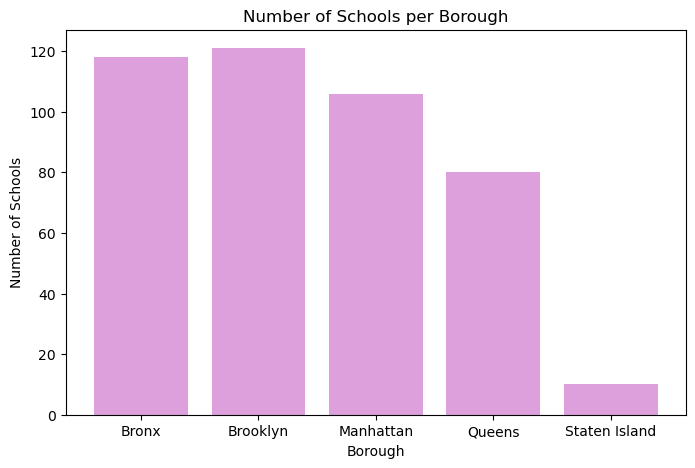

In [17]:
# Bar chart: Number of schools per borough
plt.figure(figsize=(8,5))
plt.bar(borough_summary['borough'], borough_summary['unique_schools'], color='plum')
plt.title('Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.show()


    Insights / Key Findings

* Brooklyn has the highest number of schools (121), slightly more than Bronx (118).

* Staten Island has the fewest schools, but the largest average student population per school (1847).

* Queens and Manhattan have moderate school counts and class sizes.

* The dataset suggests that student distribution is uneven — some boroughs have fewer but larger schools.

* This analysis helped me understand how to filter, group, and visualize real data using Python and Pandas.

* Bronx and Brooklyn together account for almost half of all schools in NYC, showing that educational institutions are highly concentrated in these two boroughs.